<a href="https://colab.research.google.com/github/malay-pal/object_detection/blob/main/object_detection_inference_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/wbc_detection/models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/gdrive/My Drive/wbc_detection/models/research
Processing /content/gdrive/My Drive/wbc_detection/models/research
     |████████████████████████████████| 9.0MB 6.8MB/s 
     |████████████████████████████████| 358kB 47.6MB/s 
     |████████████████████████████████| 1.1MB 50.2MB/s 
     |████████████████████████████████| 829kB 39.4MB/s 
     |████████████████████████████████| 2.2MB 47.0MB/s 
     |████████████████████████████████| 153kB 38.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 17.7MB 237kB/s 
     |████████████████████████████████| 706kB 41.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
     |████████████████████████████████| 174kB 43.2MB/s 
     |████████████████████████████████| 37.6MB 1.3MB/s 
     |████████████████████████████████| 1.2MB 38.0MB/s 
     |████████████████████████████████| 645kB 4

In [ ]:
%cd /content/gdrive/My\ Drive/wbc_detection/dataset/training/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8
import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_MODEL_DIR='saved_model'
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + '/saved_model'

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

/content/gdrive/My Drive/wbc_detection/dataset/training/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8
Loading model...Done! Took 20.72029948234558 seconds


In [ ]:
PATH_TO_LABELS = 'object-detection.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)
#IMAGE_PATHS = '/content/gdrive/My\ Drive/wbc_detection/dataset/images/test'

In [ ]:
%cd /content/gdrive/My\ Drive/wbc_detection/dataset/images/test
IMAGE_PATHS = 'd39f321d-fb60-4823-9208-b24670c62ddc_30408_2.jpg'

/content/gdrive/My Drive/wbc_detection/dataset/images/test


In [ ]:
print(IMAGE_PATHS)

d39f321d-fb60-4823-9208-b24670c62ddc_30408_2.jpg


In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline


def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)



/content/gdrive/My Drive/wbc_detection/dataset/images
Elapsed time: 4.0717549324035645 second per image


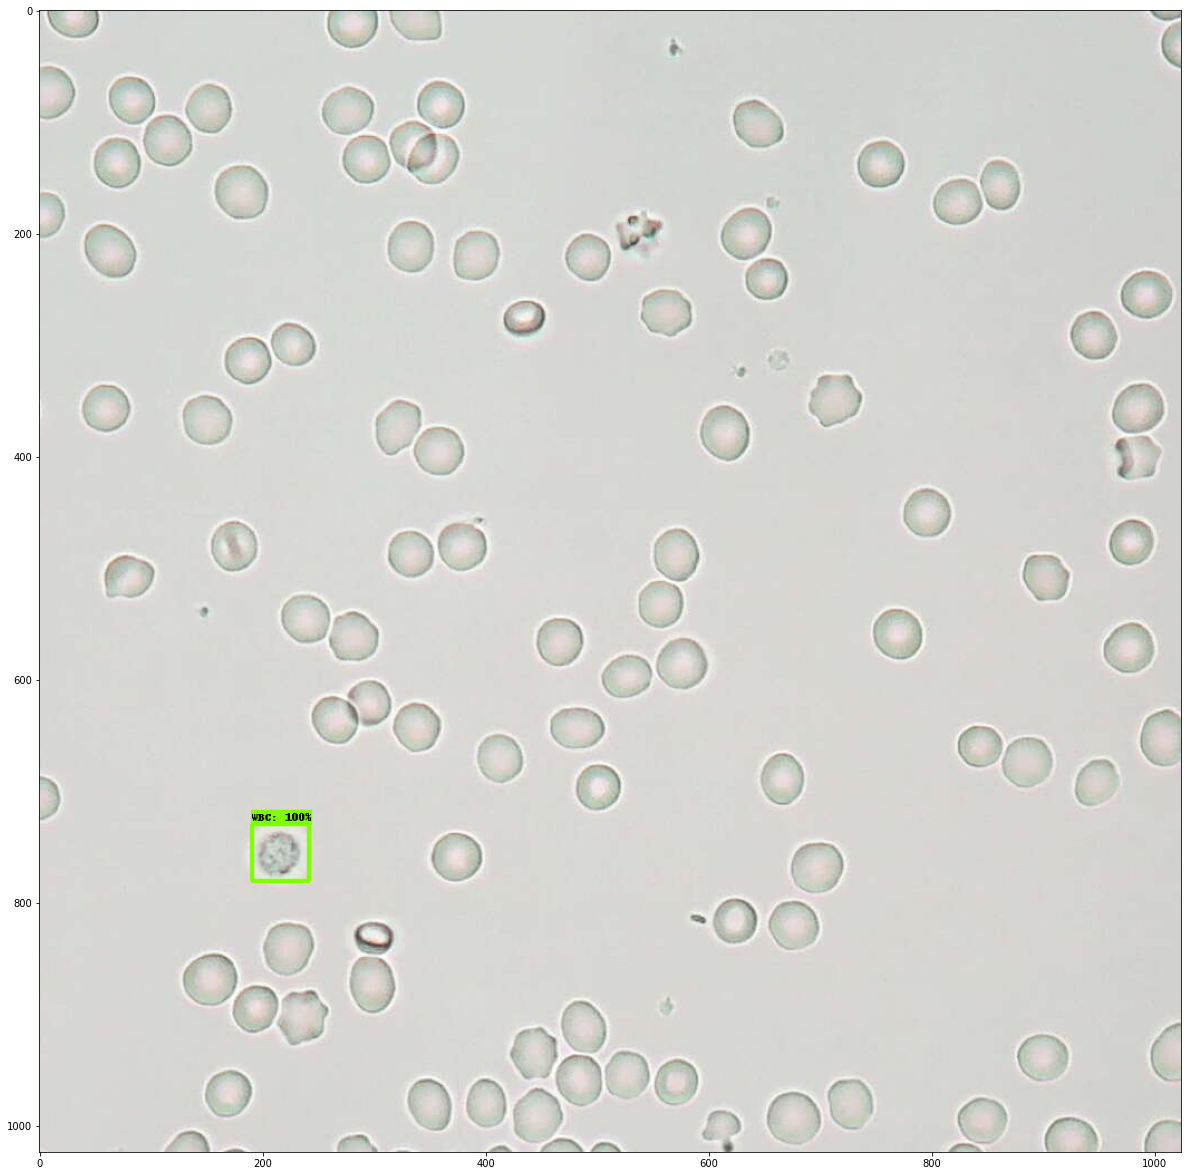

In [ ]:
%cd /content/gdrive/My\ Drive/wbc_detection/dataset/images/

import time
import os

image_dir = 'test_test'

elapsed = []

image_path = os.path.join(image_dir, 'image' + str(1) + '.jpg')
image_np = load_image_into_numpy_array(image_path)
input_tensor = np.expand_dims(image_np, 0)
start_time = time.time()
detections = detect_fn(input_tensor)
end_time = time.time()
elapsed.append(end_time - start_time)

plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)
  #plt.subplot(1, 2, i+1)
plt.imshow(image_np_with_detections)

'''
  # num_detections gives number of objects in current frame
  num_det=detections.pop('detection_scores')
  print((num_det.numpy()>0.4).sum())

'''


mean_elapsed = sum(elapsed) / float(len(elapsed))
print('Elapsed time: ' + str(mean_elapsed) + ' second per image')


